In [1]:
from numba import config

#config.DISABLE_JIT = True

In [2]:
from tardis.io.configuration.config_reader import Configuration
from tardis.workflows.type_iip_workflow import TypeIIPWorkflow

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

Initializing tabulator and plotly panel extensions for widgets to work


Auto-detected VSCode environment


Auto-detected VSCode environment


This notebook uses existing atomic data from the Vogl IIp paper converted to an updated format. It can be found on moria in /storage/group_storage/atom_data/iip_data/

In [3]:
iip_conf = Configuration.from_yaml('iip_config.yml')

The config here is not particularly good or appropriate for a IIp currently. It is mostly to test a pure hydrogen ejecta with continuum processes and non-thermal equilibrium plasma calculations. None of the other values are necessarily appropriate to model a IIp. 

# MUST BE AT LEAST 2 SHELLS

In [4]:
workflow = TypeIIPWorkflow(iip_conf)

BokehModel(combine_events=True, render_bundle={'docs_json': {'558435f8-ed83-4daf-8a4e-b76967f74cb2': {'version…

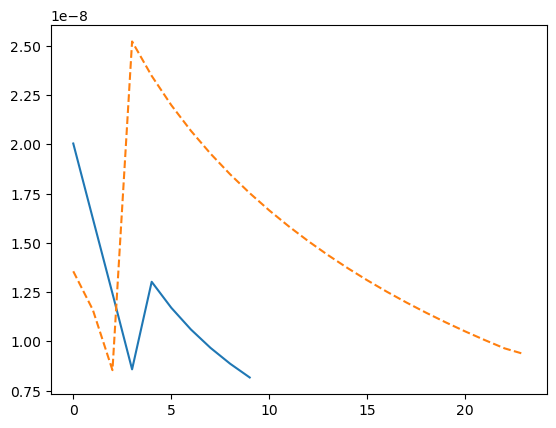

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

j_blues_ctardis = pd.read_csv(
    "/home/afullard/tardis-chvogl-configs/j_blues_first.csv", index_col=0
)
plt.plot(workflow.plasma_solver.j_blues[0])
plt.plot(j_blues_ctardis.values[0], linestyle="dashed")

In [6]:
workflow.run()

Solving opacity
First iteration use usual fb cooling rate
Solving Monte Carlo transport
Updating simulation
Solving plasma
Solving opacity
Solving Monte Carlo transport
Updating simulation
Solving plasma
Solving opacity
Solving Monte Carlo transport
Updating simulation
Solving plasma
Solving opacity
Solving Monte Carlo transport
Updating simulation
Solving plasma


In [7]:
import matplotlib.pyplot as plt
spectrum = workflow.spectrum_solver.spectrum_real_packets

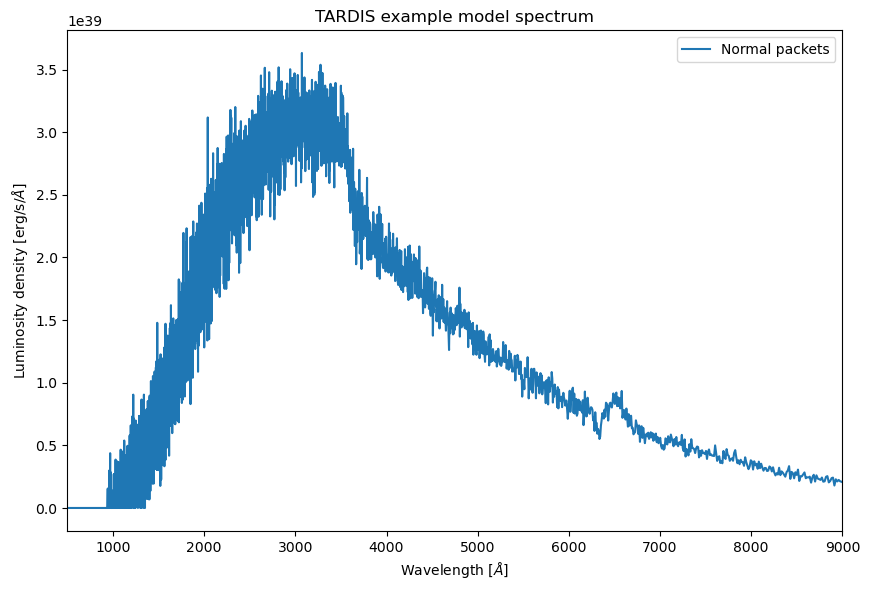

In [8]:
%matplotlib inline
plt.figure(figsize=(10, 6.5))

spectrum.plot(label="Normal packets")

plt.xlim(500, 9000)
plt.title("TARDIS example model spectrum")
plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel(r"Luminosity density [erg/s/$\AA$]")
plt.legend()
plt.show()

<Axes: xlabel='$\\text{Wavelength}\\,[\\mathrm{\\mathring{A}}]$', ylabel='$L_{\\lambda}\\,[\\mathrm{erg\\,s^{-1}\\,\\mathring{A}^{-1}}]$'>

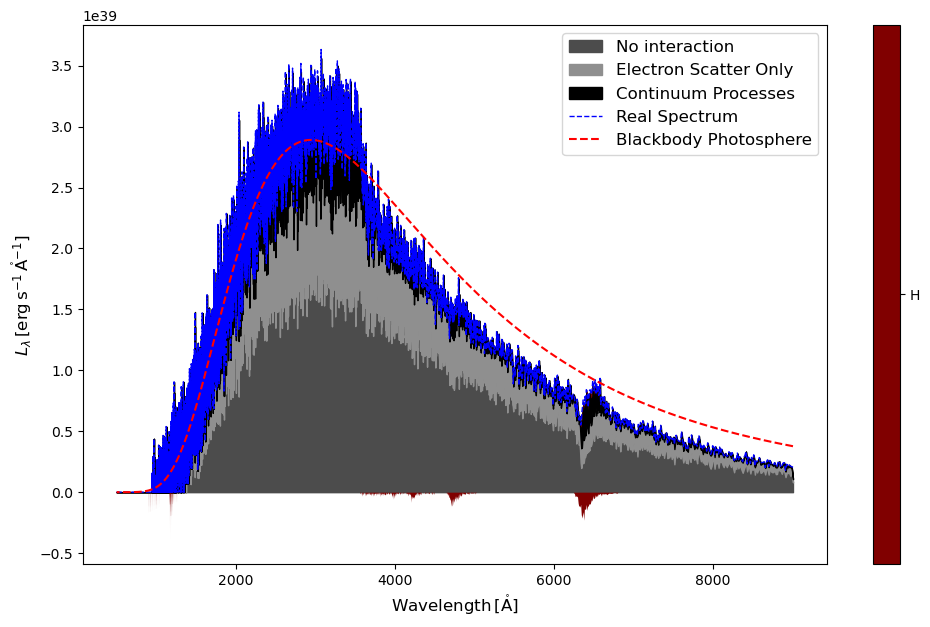

In [9]:
from tardis.visualization import SDECPlotter
import astropy.units as u

plotter = SDECPlotter.from_workflow(workflow)

plotter.generate_plot_mpl(packets_mode="real", packet_wvl_range=[500, 9000] * u.AA)

In [10]:
workflow.transport_state.tracker_last_interaction_df[workflow.transport_state.tracker_last_interaction_df["last_interaction_type"] == "CONTINUUM_PROCESS"]

,event_id,last_interaction_type,status,radius,shell_id,before_nu,before_mu,before_energy,after_nu,after_mu,after_energy,line_absorb_id,line_emit_id
packet_id,,,,,,,,,,,,,
2,12.0,CONTINUUM_PROCESS,IN_PROCESS,1.600751e+15,3,3.124369e+14,-0.489532,0.000002,1.025662e+15,0.751245,0.000002,-1,-1
6,2.0,CONTINUUM_PROCESS,IN_PROCESS,1.398319e+15,0,8.548382e+14,-0.128988,0.000002,8.734672e+14,-0.557376,0.000002,-1,-1
22,2.0,CONTINUUM_PROCESS,IN_PROCESS,1.431680e+15,0,4.142404e+14,-0.674727,0.000002,4.424209e+14,-0.937859,0.000002,-1,-1
25,2.0,CONTINUUM_PROCESS,IN_PROCESS,1.463596e+15,1,2.562137e+14,0.540415,0.000002,9.269041e+14,0.665720,0.000002,-1,-1
35,1.0,CONTINUUM_PROCESS,IN_PROCESS,1.411122e+15,0,2.787898e+14,0.960644,0.000002,8.398528e+14,-0.810407,0.000002,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499962,2.0,CONTINUUM_PROCESS,IN_PROCESS,1.459952e+15,1,4.341381e+14,0.370708,0.000002,1.044356e+15,0.857608,0.000002,-1,-1
499971,1.0,CONTINUUM_PROCESS,IN_PROCESS,1.437563e+15,0,1.882949e+14,0.429626,0.000002,1.259660e+15,-0.943433,0.000002,-1,-1
499972,1.0,CONTINUUM_PROCESS,IN_PROCESS,1.409404e+15,0,2.468562e+14,0.827173,0.000002,1.012108e+15,-0.557570,0.000002,-1,-1


In [11]:
from tardis.visualization.tools.liv_plot import LIVPlotter

<Axes: xlabel='Last Interaction Velocity (km/s)', ylabel='Packet Count'>

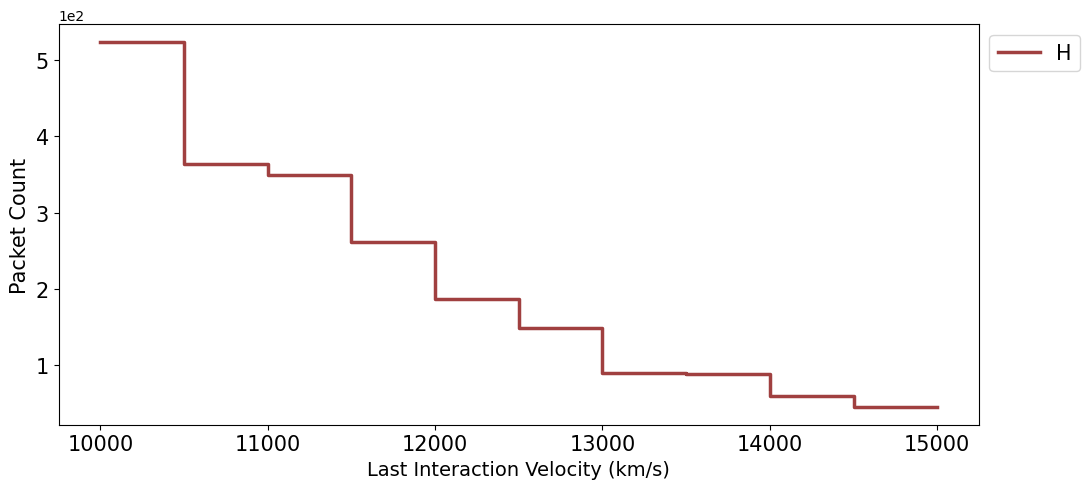

In [12]:
plotter = LIVPlotter.from_workflow(workflow)

plotter.generate_plot_mpl(packets_mode="real")